<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 4 bis (Ejercicio N°7 Guia de Ejercicios TP N°2)
#### Tomas A. Albanesi


## Indice de contenidos:
* [Consigna](#consigna)
* [Punto 1](#punto1)
    * [1.a. Resolucion analitica](#punto1a)
* [Punto 2](#punto2)
    * [2.a. Resolucion analitica](#punto2a)
* [Punto 3](#punto3)
    * [3.a. Resolucion analitica](#punto3a)
* [Punto 4](#punto4)
    * [4.a. Resolucion analitica](#punto4a)
* [Punto 5](#punto5)
    * [5.a. Simulacion numerica](#punto5a)
    * [5.b. Simulacion circuital](#punto5b)
* [Conclusiones generales](#conclusiones)

## 0. Consigna <a class="anchor" id="consigna"></a>

<img src="./img/TS4bis_Albanesi_Consigna.png" width="500" /> 

## 1. Obtener la funcion transferencia normalizada del filtro <a class="anchor" id="punto1"></a>

### 1. a. Resolucion analitica <a class="anchor" id="punto1a"></a>

In [10]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./docs/TS4bis_Albanesi_Punto1Analitico.pdf", width=1000, height=1000)

## 2. Graficar el diagrama de polos y ceros <a class="anchor" id="punto2"></a>

### 2. a. Resolucion analitica  <a class="anchor" id="punto2a"></a>

In [11]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./docs/TS4bis_Albanesi_Punto2Analitico.pdf", width=1000, height=1000)

## 3. Graficar la transferencia (modulo y fase) del filtro pedido <a class="anchor" id="punto3"></a>

### 3. a. Resolucion analitica  <a class="anchor" id="punto3a"></a>

In [12]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./docs/TS4bis_Albanesi_Punto3Analitico.pdf", width=1000, height=1000)

## 4. Sintetizar el filtro utilizando estructuras Ackerberg-Mosberg <a class="anchor" id="punto4"></a>

### 4. a. Resolucion analitica  <a class="anchor" id="bonus4a"></a>

In [1]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./docs/TS4bis_Albanesi_Punto4Analitico.pdf", width=1000, height=1000)

## 5. Simular el filtro solicitado <a class="anchor" id="punto5"></a>

### 5. a. Simulacion numerica  <a class="anchor" id="punto5a"></a>

##### Importacion de librerias

In [34]:
# Importacion de librerias a utilizar
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

##### Inicializacion de graficos

In [30]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

##### Simulacion numerica graficos teoricos

Función de transferencia resultante:
Numerador: [0.2887 0.     0.     0.    ]
Denominador: [1.         0.8999     3.40517828 1.89098778 3.40509032 0.89983035
 0.999929  ]


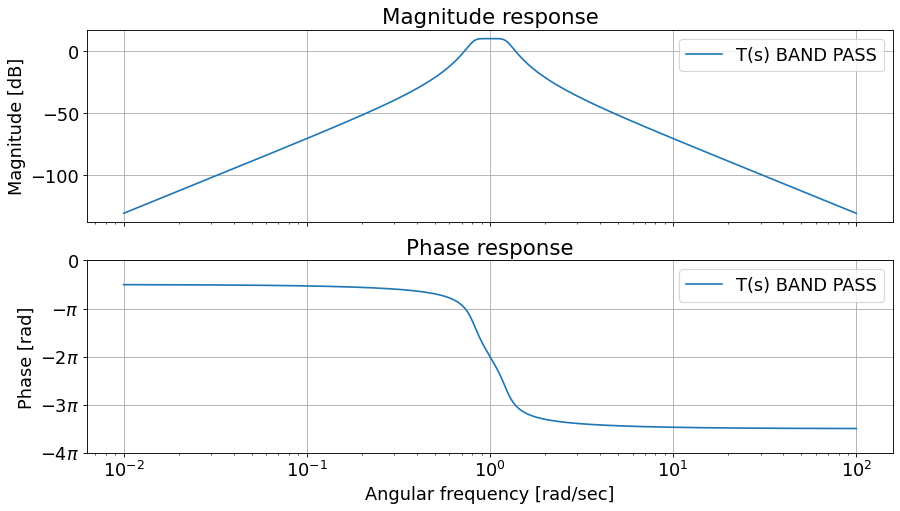

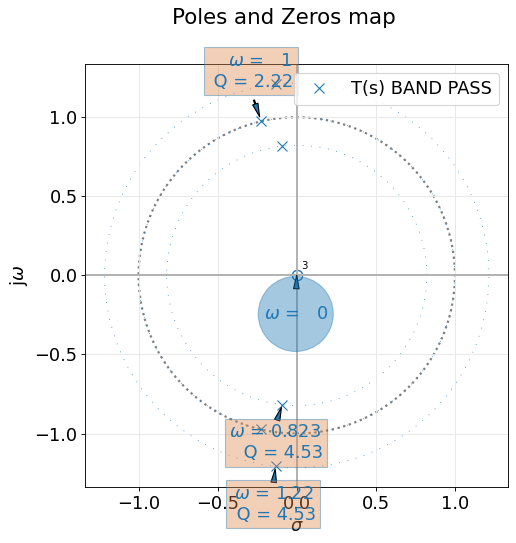

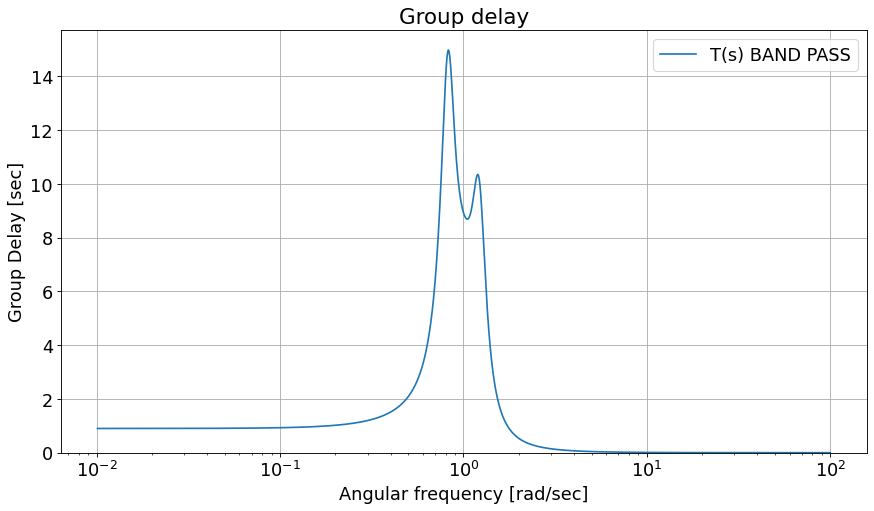

In [31]:
# Definicion de numeradores y denominadores
num_bp_et1 = [0.2887, 0]
den_bp_et1 = [1, 0.45, 1]
num_bp_et2 = [1, 0]
den_bp_et2 = [1, 0.2683, 1.477]
num_bp_et3 = [1, 0]
den_bp_et3 = [1, 0.1816, 0.677]

# Definicion de las funciones transferencia parciales y totales
num_bp_mult = np.convolve(np.convolve(num_bp_et1, num_bp_et2), num_bp_et3)
den_bp_mult = np.convolve(np.convolve(den_bp_et1, den_bp_et2), den_bp_et3)

tf_bp_mult  = signal.TransferFunction(num_bp_mult, den_bp_mult)

# Muestro resultados de la funcion transferencia resultante
print("Función de transferencia resultante:")
print(f"Numerador: {tf_bp_mult.num}")
print(f"Denominador: {tf_bp_mult.den}")

# Analizo la funcion transferencia
analyze_sys(tf_bp_mult, "T(s) BAND PASS")

##### Simulacion numerica automatica

###### Filtro pasa bajos datos

In [32]:
AdB=10
Aveces=10**(AdB/20)
wp=1
ws=2.16
alpha_max=3
alpha_min=20

###### Butterworth

#### Transferencia normalizada tipo Butterworth FILTRO PASABANDA

<IPython.core.display.Math object>

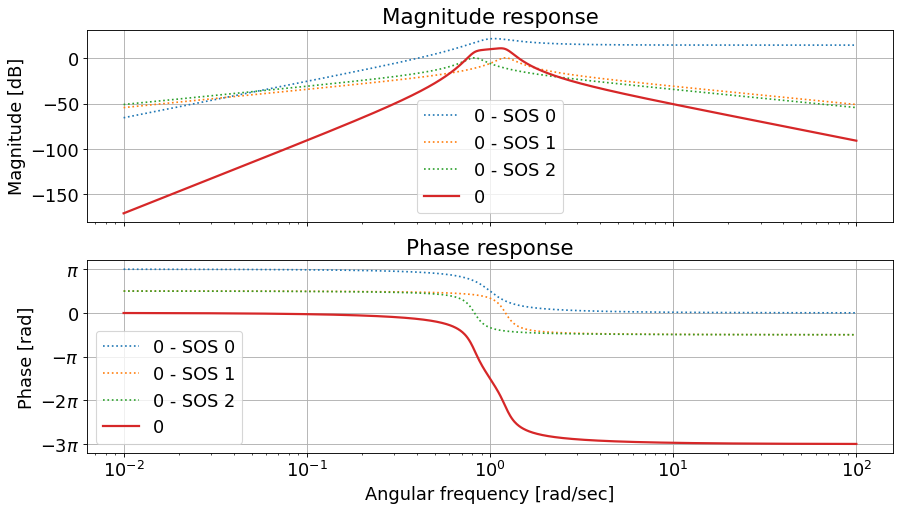

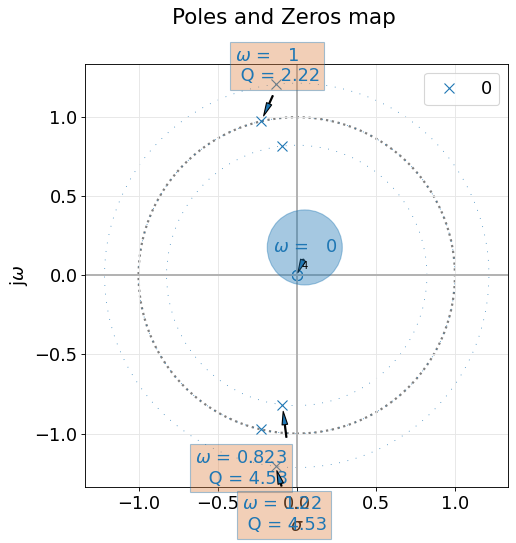

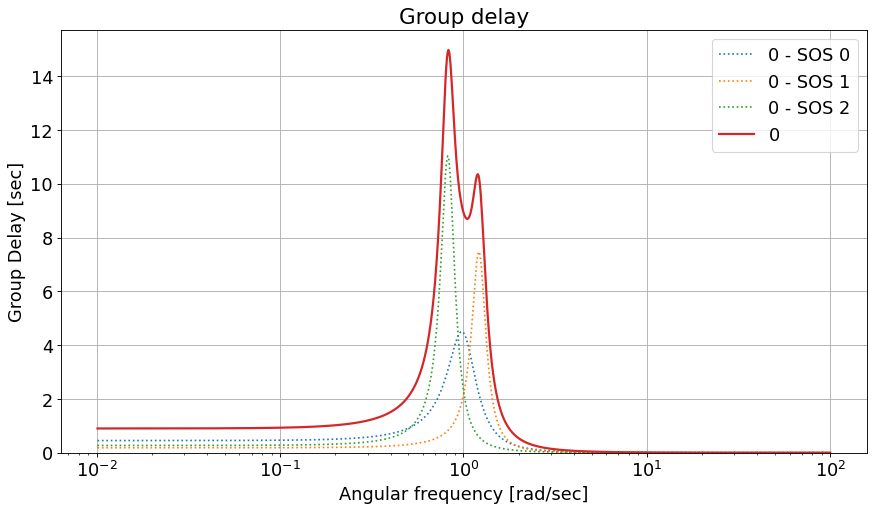

In [36]:
ee = (np.sqrt( 10**(alpha_max / 10) - 1 ))   

orden = np.ceil( 0.5 * ( np.log10( ( 10**(alpha_min * 0.1) - 1 ) / ee**2)  / np.log10(ws) ) ) 

z, p, k = signal.buttap(orden)

Num, Den = signal.zpk2tf(z, p, k)

Num, Den = signal.lp2bp(Num*Aveces, Den, 1, 0.45)

print_subtitle('Transferencia normalizada tipo Butterworth FILTRO PASABANDA')

bp = tf2sos_analog(Num, Den)

bp[bp < 1e-6] = 0.0

pretty_print_SOS(bp)

analyze_sys(bp)

### 5. b. Simulacion circuital  <a class="anchor" id="punto5b"></a>

<center> <img src="./img/TS4bis_Albanesi_Circuito.png" width="1000" /> </center>

<center> <img src="./img/TS4bis_Albanesi_Simulacion1.png" width="1000" /> </center>

<center> <img src="./img/TS4bis_Albanesi_Simulacion2.png" width="1000" /> </center>

## Conclusiones generales <a class="anchor" id="conclusiones"></a>

En general, logre obtener la transferencia, realizando la conversion de la plantilla pasa banda a pasa bajos prototipo y luego aplicando el kernel de transformacion. Luego, se logro realizar la simulacion numerica en Python y la simulacion circuital en LTSpice para verificar lo solicitado en la consigna.

Con respecto a la implementacion de la esctructura Ackerberg-Mosberg, resulta muy util para la sintesis circuital de estos tipos de filtros debido a los parametros que se deben manejar asi como a las posibilidades de filtrado.